- "state", строка. 2-буквенный код штата США, в котором проживает клиент.
- "account_length", числовая. Количество месяцев, в течение которых клиент работает с текущим оператором связи.
- "area_code", string="area_code_AAA", где AAA = трехзначный код региона.
- "international_plan", (да/нет). У клиента есть международный тарифный план.
- "voice_mail_plan", (да/нет). Клиент имеет тарифный план голосовой почты.
- "number_vmail_messages", числовой. Количество сообщений голосовой почты.
- "total_day_minutes", числовое. Общее количество минут дневных звонков.
- "total_day_calls", числовое значение. Общее количество минут звонков за день.
- "total_day_charge", числовое значение. Общая стоимость дневных звонков.
- "total_eve_minutes", числовое значение. Общее количество минут вечерних звонков.
- "total_eve_calls", числовое значение. Общее количество вечерних звонков.
- "total_eve_charge", числовое. Общая стоимость вечерних звонков.
- "total_night_minutes", числовое. Общее количество минут ночных звонков.
- "total_night_calls", числовое значение. Общее количество ночных звонков.
- "total_night_charge", числовое значение. Общая плата за ночные звонки.
- "total_intl_minutes", числовое значение. Общее количество минут международных звонков.
- "total_intl_calls", числовое значение. Общее количество международных звонков.
- "total_intl_charge", числовое. Общая стоимость международных звонков
- "number_customer_service_calls", числовое. Количество звонков в службу поддержки клиентов
- "churn", (да/нет). Отток клиентов - целевая переменная.

#Загрузка данных Kaggle


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Подготовка Kaggle API

In [ ]:
!ls /root/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [ ]:
!rm -r /root/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Загрузка данных и распаковка

In [ ]:
!kaggle competitions download -c customer-churn-prediction-2020

100% 154k/154k [00:00<00:00, 393kB/s]
100% 154k/154k [00:00<00:00, 392kB/s]


In [ ]:
!ls /content/data

ls: cannot access '/content/data': No such file or directory


In [ ]:
!rm -r /content/data

rm: cannot remove '/content/data': No such file or directory


In [ ]:
!unzip /content/customer-churn-prediction-2020.zip -d /content/data/

Archive:  /content/customer-churn-prediction-2020.zip
  inflating: /content/data/sampleSubmission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


# Просмотр загруженных данных

In [ ]:
import pandas as pd

Пример Submission

In [ ]:
submission_example = pd.read_csv("/content/data/sampleSubmission.csv")
submission_example.head()

id churn
0   1   yes
1   2    no
2   3    no
3   4   yes
4   5   yes

Данные для обучения

In [ ]:
df = pd.read_csv("/content/data/train.csv")
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

Данные для тестирования

In [ ]:
test = pd.read_csv("/content/data/test.csv")
test.head()

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    AL             118  area_code_510                yes              no   
2   3    IA              62  area_code_415                 no              no   
3   4    VT              93  area_code_510                 no              no   
4   5    NE             174  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

# Предобработка


In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas

### Разведывательный анализ данных.

In [ ]:
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'] 
 Число столблцов =  5
Числовые данные:	  ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls'] 
 Число столблцов =  15


### Анализ признаков

#### Обработка булевых признаков и с малым кол-ом уникальных значений

In [ ]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [ ]:
df.loc[:, cat_columns].head()

state      area_code international_plan voice_mail_plan churn
0    OH  area_code_415                 no             yes    no
1    NJ  area_code_415                 no              no    no
2    OH  area_code_408                yes              no    no
3    OK  area_code_415                yes              no    no
4    MA  area_code_510                 no             yes    no

In [ ]:
df.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
df.international_plan.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.voice_mail_plan.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

Заменим уникальные значения для построения графиков в area_code, voice_mail_plan, international_plan, churn

In [ ]:
df.area_code = df.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})
test.area_code = test.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})

In [ ]:
df = df.replace({'voice_mail_plan':{'yes':1,'no':0}})
test = test.replace({'voice_mail_plan':{'yes':1,'no':0}})

In [ ]:
df = df.replace({'international_plan':{'yes':1,'no':0}})
test = test.replace({'international_plan':{'yes':1,'no':0}})

In [ ]:
df = df.replace({'churn':{'yes':1,"no":0}})
test = test.replace({'churn':{'yes':1,"no":0}})

#### Графический анализ

**Отток клиентов**

<Axes: xlabel='churn', ylabel='count'>

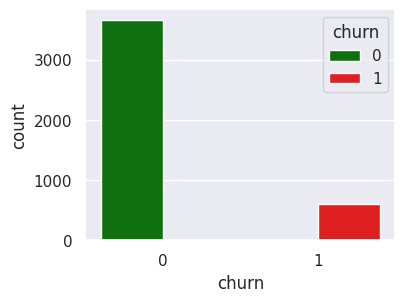

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x = 'churn',data = df, hue="churn", palette=["green", "red"], ax=ax)

**Статистика обращений в службу подержки для оставшихся и ушедших абонентов**

In [ ]:
df.groupby('churn')['number_customer_service_calls'].count()

churn
0    3652
1     598
Name: number_customer_service_calls, dtype: int64

In [ ]:
df.number_customer_service_calls.unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

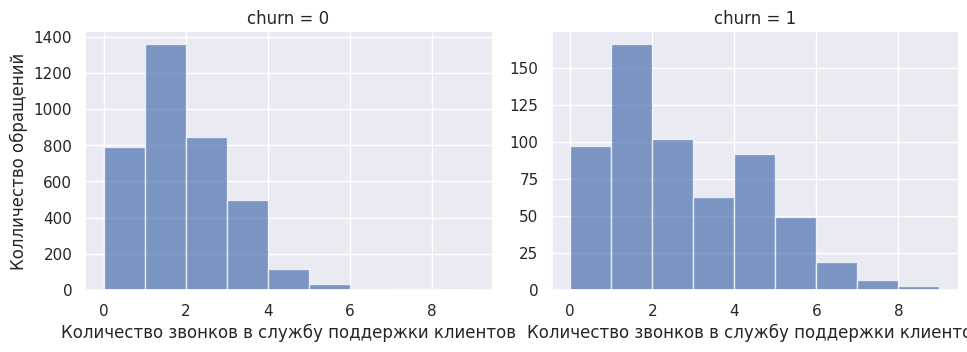

In [ ]:
g = sns.FacetGrid(df, col="churn", sharey=False, height=4, aspect=1.2)
g.map(plt.hist,"number_customer_service_calls",
      bins=range(df['number_customer_service_calls'].min(), df['number_customer_service_calls'].max() + 1, 1), alpha=0.7)
g.set_axis_labels("Количество звонков в службу поддержки клиентов", "Колличество обращений")
plt.subplots_adjust(top=0.82)
plt.show()

Из графиков можно сделать вывод, что подавляющие число абонентов которые обращаются в службу поддержки, остались клиентами компании

**Статистика по колличеству абонентов в каждом штате**

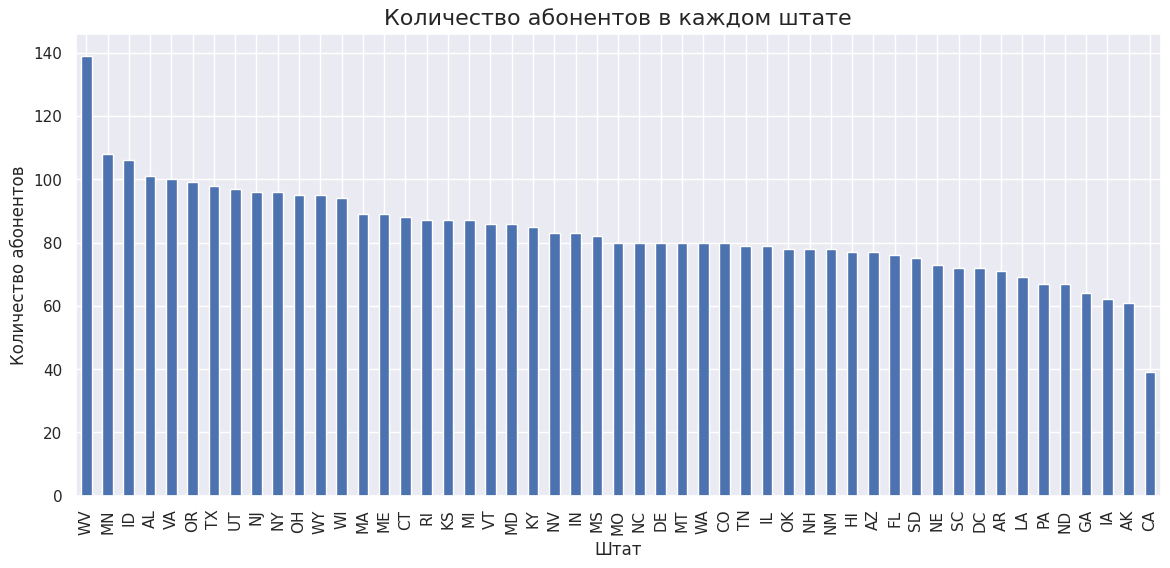

In [ ]:
fig,ax = plt.subplots(figsize = (14,6))
x = df.groupby('state')[['churn']].size().sort_values(ascending=False)
x.plot.bar()
plt.title('Количество абонентов в каждом штате', size = 16)
plt.ylabel('Количество абонентов', size = 12)
plt.xlabel('Штат', size = 12)
plt.xticks(rotation=90)
plt.show()

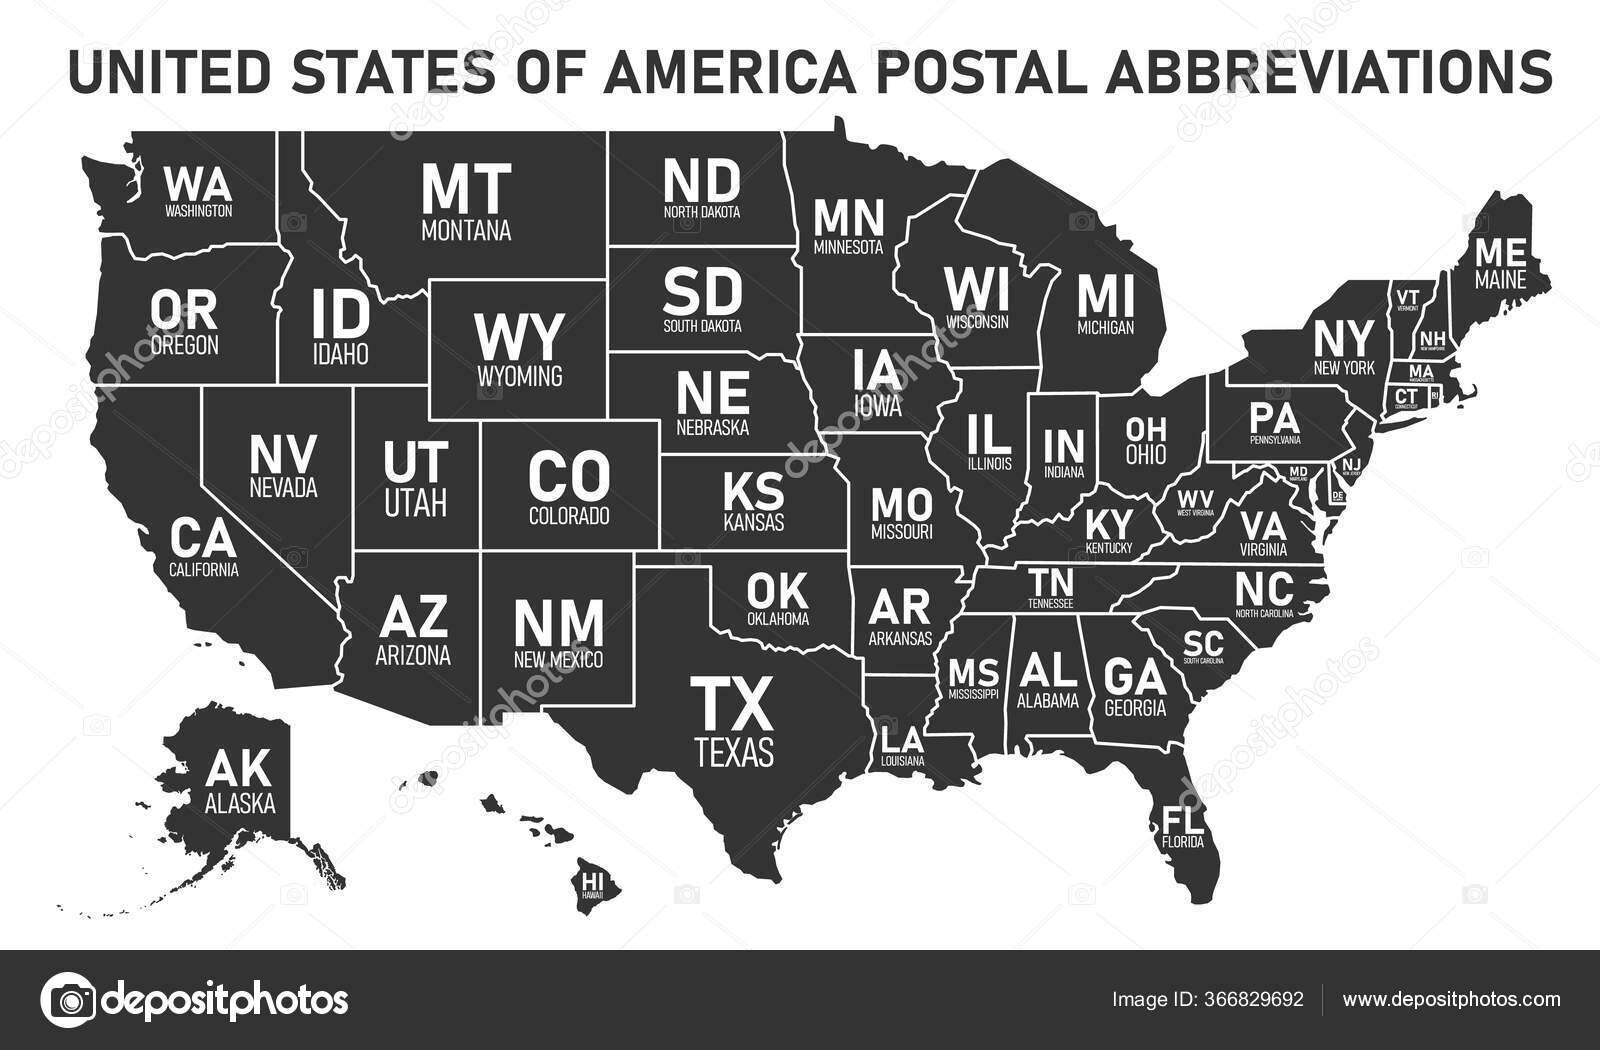

Наибольшее число абонентов проживает в Западной Вирджинии

**Графики остальных категориальных признаков**

In [ ]:
c_columns = ['area_code', 'international_plan', 'voice_mail_plan']

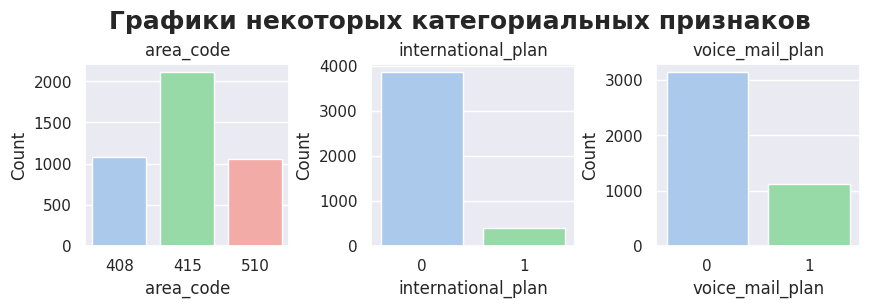

In [ ]:
fig = plt.figure(figsize=[10,9])
fig.suptitle('Графики некоторых категориальных признаков', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, column in enumerate(c_columns):
    ax1 = fig.add_subplot(3, 3, i+1)
    sns.barplot(x=np.unique(df[column], return_counts=True)[0], y=np.unique(df[column], return_counts=True)[1], ax=ax1, palette = sns.color_palette("pastel6"))
    ax1.set_title(f'{column}')
    ax1.set_xlabel(f'{column}')
    ax1.set_ylabel('Count')

In [ ]:
df.groupby('voice_mail_plan')['voice_mail_plan'].count()

voice_mail_plan
0    3138
1    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
df.groupby('international_plan')['international_plan'].count()

international_plan
0    3854
1     396
Name: international_plan, dtype: int64

Абонентов с международным пакетом <10% от общего числа абонентов.

Абонентов с пакетом голосовых сообщений ~25% от общего числа абонентов.

**Построим матрицу коререляции данных**

<ipython-input-40-d48fec7881aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr() # вычисление матрицы корреляции


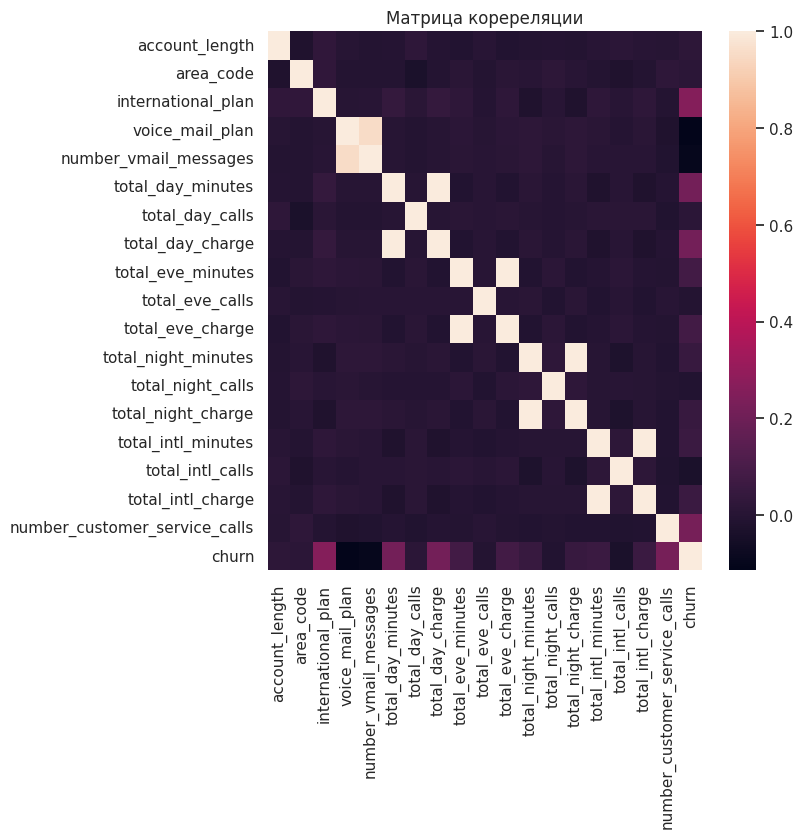

In [ ]:
fig = plt.figure(figsize=[7,7])
corr_matrix = df.corr() # вычисление матрицы корреляции
# corr_matrix = np.round(corr_matrix, 3) # округление значений до 2 знаков после запятой
# corr_matrix[abs(corr_matrix) < 0.02] = 0

sns.heatmap(corr_matrix)
plt.title('Матрица коререляции')
plt.show()

Колличество минут и подзарядок имеют прямую корреляцию

**Графики числовых признаков**

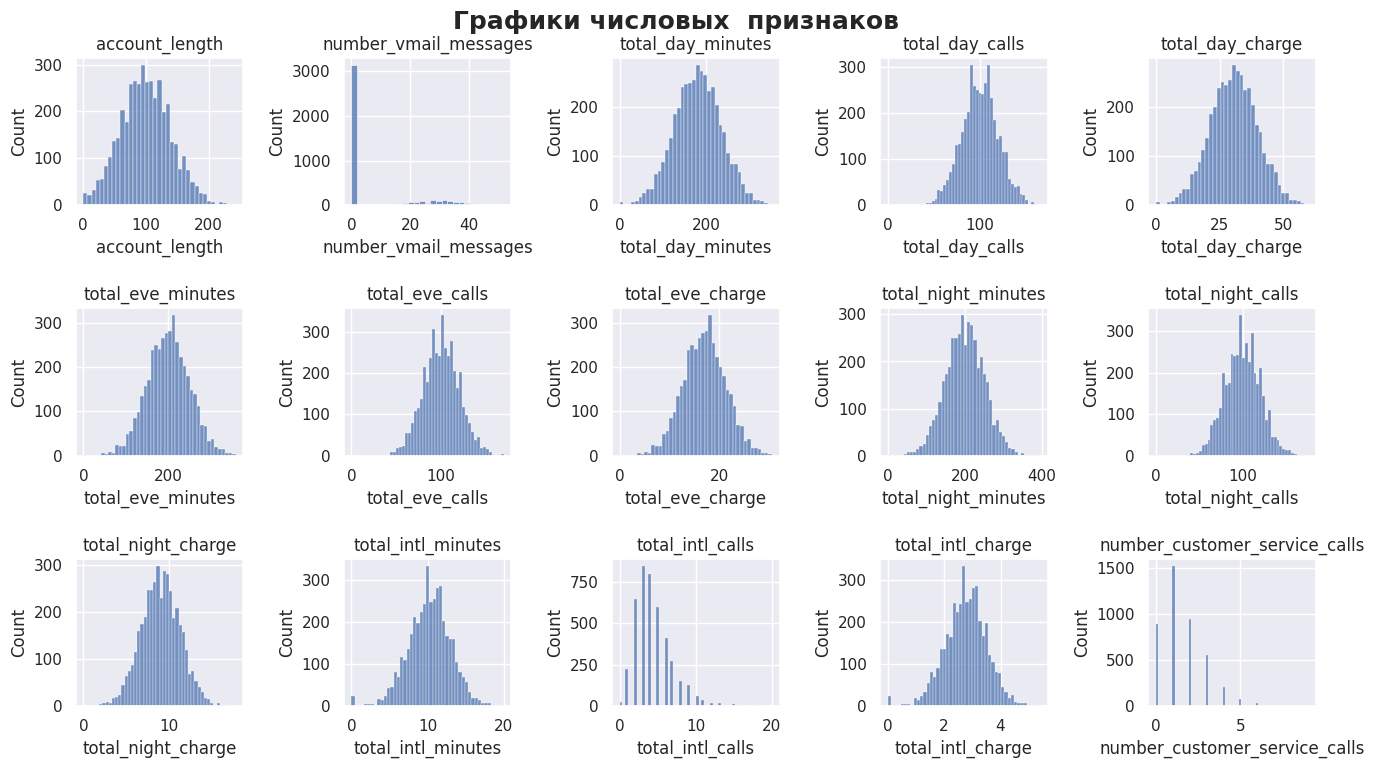

In [ ]:
fig = plt.figure(figsize=(16,8))
fig.suptitle('Графики числовых  признаков', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.7, wspace=0.6);
width = 5
height = int(np.ceil(len(num_columns)/width))
# fig = plt.subplots(nrows=height, ncols=width, figsize=(16,8)) # создаем "полотно", на котором будем "рисовать" графики
# #     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns):

    ax1 = plt.subplot(height, width, idx+1)
    sns.histplot(data=df, x=column_name, ax = ax1);
    ax1.set_title(f'{column_name}')
    ax1.set_xlabel(f'{column_name}')
    ax1.set_ylabel('Count')

Столбцы графика number_vmail_messages имеют явные аномалии. Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

In [ ]:
num_columns

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

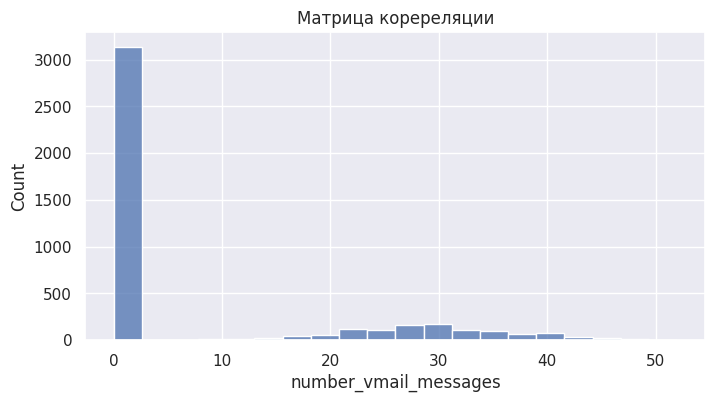

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.histplot(data=df, x='number_vmail_messages', bins = 20);
plt.title('Матрица коререляции')
ax.set_xlabel('number_vmail_messages')
ax.set_ylabel('Count')
plt.show()

Такое распредеоение связано с малым колличеством абонентов с тарифом для голосовых 1/4 от всех пользователей.

*Т.к. статистика минут и подзарядок имеет прямую корреляцию для всех признаков, а международный тариф имеет менее 10%, то можно было бы удалить признаки связанный с наличием международного тарифа. Однако т.к. по числовым графикам видно что по ним совершаются звонки стоит повторно составить корреляцию с оттоком и посмотреть влияет ли это*

*С тарифом для голосовых аналогично, однако в отличии от статистики тарифных планов, подавляющее большинство не пользуется голосовыми сообщениями, поэтому можно удалить признак number_vmail_messages.*

Также можно удалить признаки charge т.к. они имеют прямую корреляцию с minutes.

In [ ]:
df.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0    OH             107        415                   0                1   
1    NJ             137        415                   0                0   
2    OH              84        408                   1                0   
3    OK              75        415                   1                0   
4    MA             121        510                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

In [ ]:
## 'international_plan', 'voice_mail_plan',

In [ ]:
df = df.drop(columns=['state','number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'])
df.head()

account_length  area_code  international_plan  voice_mail_plan  \
0             107        415                   0                1   
1             137        415                   0                0   
2              84        408                   1                0   
3              75        415                   1                0   
4             121        510                   0                1   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              161.6              123              195.5              103   
1              243.4              114              121.2              110   
2              299.4               71               61.9               88   
3              166.7              113              148.3              122   
4              218.2               88              348.5              108   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                254.4                103                13.7   
1                162.6                104                12.2   
2                196.9                 89                 6.6   
3                186.9                121                10.1   
4                212.6                118                 7.5   

   total_intl_calls  number_customer_service_calls  churn  
0                 3                              1      0  
1                 5                              0      0  
2                 7                              2      0  
3                 3                              3      0  
4                 7                              3      0

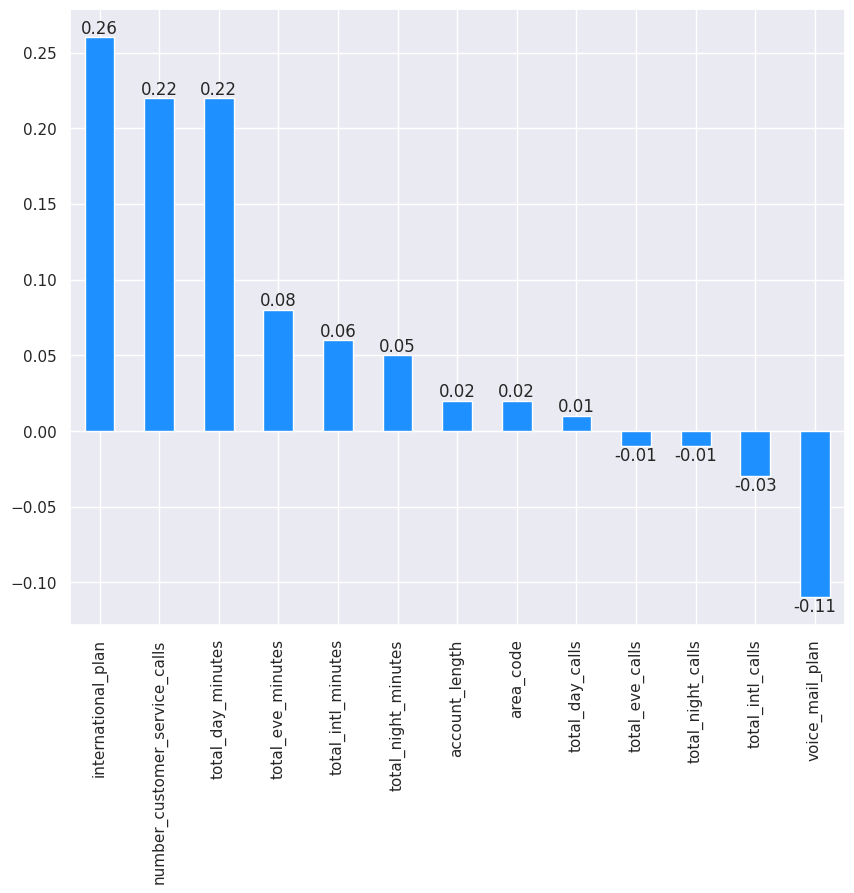

In [ ]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (10,8))
ax.bar_label(ax.containers[0])
plt.show()

#### Пронормируем признаки и заменим категориальный признак state через LabelEncoder


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

In [ ]:
df_norm.head()

account_length  area_code  international_plan  voice_mail_plan  \
0        0.170399  -0.517230           -0.320547         1.679864   
1        0.926186  -0.517230           -0.320547        -0.595286   
2       -0.409038  -0.683191            3.119667        -0.595286   
3       -0.635774  -0.517230            3.119667        -0.595286   
4        0.523099   1.735100           -0.320547         1.679864   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0          -0.345510         1.163449          -0.093025         0.141841   
1           1.169136         0.710014          -1.571820         0.493490   
2           2.206058        -1.456398          -2.752070        -0.611691   
3          -0.251076         0.659633          -1.032448         1.096316   
4           0.702522        -0.599910           2.952139         0.393019   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0             1.070003           0.157309            1.247901   
1            -0.753320           0.207083            0.704379   
2            -0.072057          -0.539526           -1.324770   
3            -0.270676           1.053239           -0.056552   
4             0.239775           0.903917           -0.998657   

   total_intl_calls  number_customer_service_calls     churn  
0         -0.579164                      -0.426346 -0.404655  
1          0.232927                      -1.188960 -0.404655  
2          1.045017                       0.336268 -0.404655  
3         -0.579164                       1.098882 -0.404655  
4          1.045017                       1.098882 -0.404655

# Обучение модели

###Создание выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('churn' , 1 )
Y = df['churn']

<ipython-input-52-2f9305366a0b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('churn' , 1 )


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , Y  ,test_size = 0.20 , random_state = 228)

In [ ]:
X.head()

account_length  area_code  international_plan  voice_mail_plan  \
0             107        415                   0                1   
1             137        415                   0                0   
2              84        408                   1                0   
3              75        415                   1                0   
4             121        510                   0                1   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              161.6              123              195.5              103   
1              243.4              114              121.2              110   
2              299.4               71               61.9               88   
3              166.7              113              148.3              122   
4              218.2               88              348.5              108   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                254.4                103                13.7   
1                162.6                104                12.2   
2                196.9                 89                 6.6   
3                186.9                121                10.1   
4                212.6                118                 7.5   

   total_intl_calls  number_customer_service_calls  
0                 3                              1  
1                 5                              0  
2                 7                              2  
3                 3                              3  
4                 7                              3

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

### Модели и предсказания

In [ ]:
from sklearn.linear_model import LogisticRegression #1
from sklearn.ensemble import RandomForestClassifier #3
from sklearn.svm import SVC #2
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score, precision_score , recall_score, ConfusionMatrixDisplay

In [ ]:
def confusion_matrix_plot(X_test , y_test , classifier):
    ax = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"])

In [ ]:
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )

    top_weights_selected = weights[:5]
    plt.figure(figsize=(5,4))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])

    return print("")

#### Logistic Regression

In [ ]:
LogReg = LogisticRegression(random_state=228)
LogReg.fit(X_train, y_train)
y_pred_lr = LogReg.predict(X_test)
LogReg.score(X_test , y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8552941176470589

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       726
           1       0.53      0.07      0.13       124

    accuracy                           0.86       850
   macro avg       0.70      0.53      0.52       850
weighted avg       0.81      0.86      0.81       850




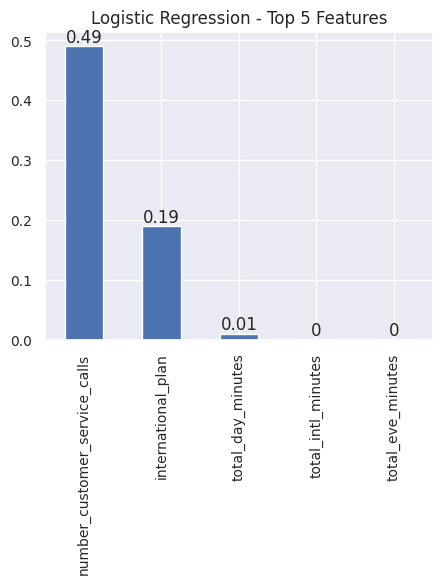

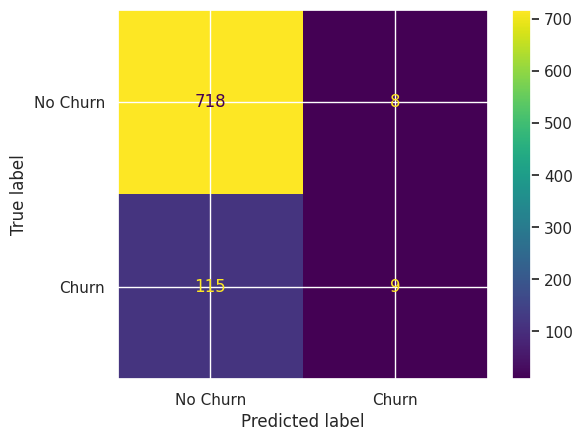

In [ ]:
print(metrics.classification_report(y_test, y_pred_lr))
feature_weights(X_train , LogReg , "Logistic Regression")
confusion_matrix_plot(X_test , y_test , LogReg)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(LogReg, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=228))

print('Результаты Кросс-валидации')
DF_cv_LogReg = pd.DataFrame(scores)
display(DF_cv_LogReg)
print('\n')
print(DF_cv_LogReg.mean()[2:])

Результаты Кросс-валидации


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  0.033451    0.008500  0.864706  0.098039        0.625000     0.053191
1  0.032930    0.007872  0.857353  0.093458        0.416667     0.052632
2  0.033134    0.008248  0.861765  0.129630        0.538462     0.073684
3  0.042960    0.008459  0.855882  0.109091        0.400000     0.063158
4  0.033300    0.007975  0.857353  0.224000        0.466667     0.147368



test_ACC          0.859412
test_F1           0.130844
test_Precision    0.489359
test_Recall       0.078007
dtype: float64


#### Support Vector Machine (SVC)

In [ ]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
svm.score(X_test , y_test)

0.8541176470588235

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       726
           1       0.00      0.00      0.00       124

    accuracy                           0.85       850
   macro avg       0.43      0.50      0.46       850
weighted avg       0.73      0.85      0.79       850



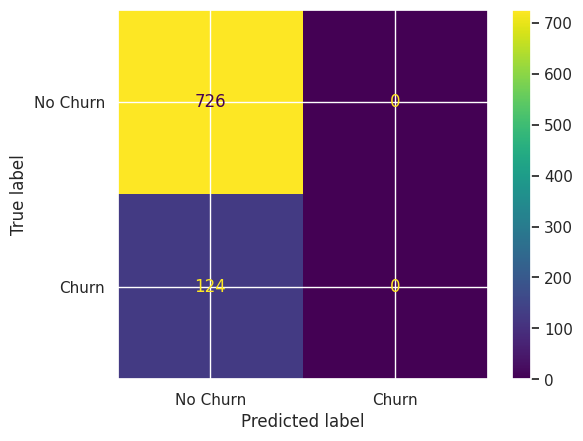

In [ ]:
print(metrics.classification_report(y_test, y_pred_svm))
confusion_matrix_plot(X_test , y_test , svm)

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(svm, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=228))

print('Результаты Кросс-валидации')
DF_cv_svm = pd.DataFrame(scores)
display(DF_cv_svm)
print('\n')
print(DF_cv_svm.mean()[2:])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Результаты Кросс-валидации


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fit_time  score_time  test_ACC  test_F1  test_Precision  test_Recall
0  0.772741    0.039312  0.861765      0.0             0.0          0.0
1  0.872984    0.057533  0.860294      0.0             0.0          0.0
2  1.547499    0.069467  0.860294      0.0             0.0          0.0
3  2.931944    0.147102  0.860294      0.0             0.0          0.0
4  1.918485    0.089560  0.860294      0.0             0.0          0.0



test_ACC          0.860588
test_F1           0.000000
test_Precision    0.000000
test_Recall       0.000000
dtype: float64


#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf.score(X_test , y_test)

0.9588235294117647

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       726
           1       0.97      0.74      0.84       124

    accuracy                           0.96       850
   macro avg       0.96      0.87      0.91       850
weighted avg       0.96      0.96      0.96       850



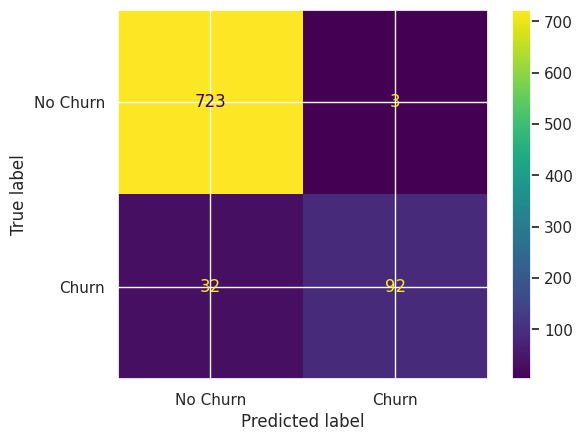

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))
confusion_matrix_plot(X_test , y_test , rf)

In [ ]:
scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

scores = cross_validate(rf, X_train, y_train,
                      scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=228))

print('Результаты Кросс-валидации')
DF_cv_rf = pd.DataFrame(scores)
display(DF_cv_rf)
print('\n')
print(DF_cv_rf.mean()[2:])

Результаты Кросс-валидации


fit_time  score_time  test_ACC   test_F1  test_Precision  test_Recall
0  1.120045    0.033352  0.957353  0.819876        0.985075     0.702128
1  0.945685    0.032784  0.944118  0.753247        0.983051     0.610526
2  0.881763    0.033290  0.951471  0.800000        0.942857     0.694737
3  0.792882    0.031679  0.954412  0.809816        0.970588     0.694737
4  0.820984    0.036694  0.954412  0.814371        0.944444     0.715789



test_ACC          0.952353
test_F1           0.799462
test_Precision    0.965203
test_Recall       0.683583
dtype: float64


### Отбор Гипер Параметров

Подбор гиперпараметров для Support Vector Machine (SVC)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import ShuffleSplit

In [ ]:
C_range = loguniform(1e-2, 1e2)
gamma_range = loguniform(1e-2, 1e0)
C_range_poly = loguniform(1e-1, 1e1)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range,},
                    {'kernel': ['poly'], 'degree': [2,3,4,], 'C': C_range_poly, }]


n_iter_search = 15
SVС_search = RandomizedSearchCV(estimator = SVC(coef0=0.5), verbose = 3,
                          param_distributions=tuned_parameters ,
                          cv=StratifiedKFold(n_splits=5, shuffle = True,random_state=228),n_iter = n_iter_search)

SVС_search.fit(X_train, y_train)

svc_best=SVС_search.best_estimator_

svc_best.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END C=2.3357900892734356, degree=4, kernel=poly;, score=0.866 total time=   0.5s
[CV 2/5] END C=2.3357900892734356, degree=4, kernel=poly;, score=0.866 total time=   0.5s
[CV 3/5] END C=2.3357900892734356, degree=4, kernel=poly;, score=0.868 total time=   0.5s
[CV 4/5] END C=2.3357900892734356, degree=4, kernel=poly;, score=0.866 total time=   0.6s
[CV 5/5] END C=2.3357900892734356, degree=4, kernel=poly;, score=0.871 total time=   1.3s
[CV 1/5] END C=1.746803765217208, degree=2, kernel=poly;, score=0.862 total time=   0.8s
[CV 2/5] END C=1.746803765217208, degree=2, kernel=poly;, score=0.860 total time=   0.5s
[CV 3/5] END C=1.746803765217208, degree=2, kernel=poly;, score=0.860 total time=   0.6s
[CV 4/5] END C=1.746803765217208, degree=2, kernel=poly;, score=0.860 total time=   0.3s
[CV 5/5] END C=1.746803765217208, degree=2, kernel=poly;, score=0.860 total time=   0.5s
[CV 1/5] END C=0.6173667368149113, gamma=0.0

In [ ]:
svc_best

SVC(C=2.3357900892734356, coef0=0.5, degree=4, kernel='poly')

In [ ]:
y_pred_svc_best = svc_best.predict(X_test)
svc_best.score(X_test , y_test)

0.8741176470588236

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       726
           1       0.90      0.15      0.26       124

    accuracy                           0.87       850
   macro avg       0.89      0.58      0.60       850
weighted avg       0.88      0.87      0.83       850



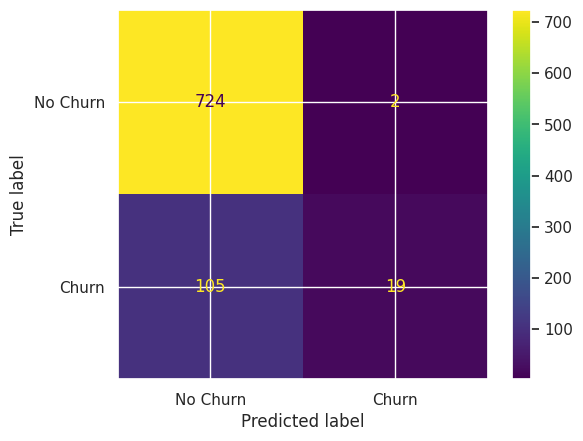

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc_best))
confusion_matrix_plot(X_test , y_test , svc_best)

Подбор гиперпараметров для RandomForestClassifier

In [ ]:
from scipy.stats import randint as sp_randint

In [ ]:
param_dist = {"n_estimators": sp_randint(10, 200), # количество деревьев в лесу
              "max_depth": sp_randint(1, 50), # максимальная глубина дерева
              "max_features": ["sqrt", "log2", None], # количество характеристик, которые необходимо учитывать для каждого разделения узла(листа)
              "min_samples_split": sp_randint(2, 11), # минимальное количество образцов, необходимое для разделения узла(листа)
              "min_samples_leaf": sp_randint(1, 11)} # минимальное количество образцов, необходимых в каждом листовом

rfc = RandomForestClassifier()

n_iter_search = 15
rfc_search = RandomizedSearchCV(estimator=rfc,
                                param_distributions=param_dist,
                                n_iter=n_iter_search,
                                cv=StratifiedKFold(n_splits=5, shuffle = True,random_state=228),
                                verbose=3,
                                n_jobs=-1)

In [ ]:
# подгонка модели по обучающим данным
rfc_search.fit(X_train, y_train)

# получить наилучшие параметры и наилучшую оценку, найденные в ходе поиска
best_params = rfc_search.best_params_
best_score = rfc_search.best_score_

# создать новый объект модели с наилучшими параметрами
rfc_best = RandomForestClassifier(**best_params)

rfc_best.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomForestClassifier(max_depth=49, max_features=None, min_samples_leaf=5,
                       min_samples_split=9, n_estimators=145)

In [ ]:
y_pred_rf_best = rfc_best.predict(X_test)
rfc_best.score(X_test , y_test)

0.9588235294117647

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       726
           1       0.93      0.77      0.85       124

    accuracy                           0.96       850
   macro avg       0.95      0.88      0.91       850
weighted avg       0.96      0.96      0.96       850



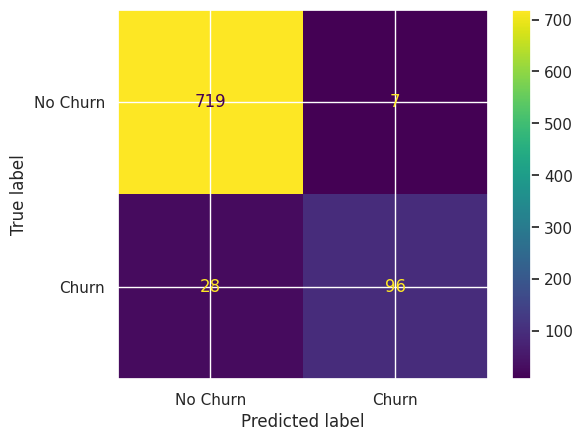

In [ ]:
print(metrics.classification_report(y_test, y_pred_rf_best))
confusion_matrix_plot(X_test , y_test , rfc_best)

# Submission

In [ ]:
print(X_train.columns)
print(test.columns)

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_eve_minutes',
       'total_eve_calls', 'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls'],
      dtype='object')
Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


In [ ]:
def diff_lists(list1, list2):
    diff = []
    for value in list1:
        if value not in list2:
            diff.append(value)
    return diff

result = diff_lists(test.columns, X_train.columns)
print(result)

['id', 'state', 'number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']


In [ ]:
test_dr = test.drop(['id', 'state', 'number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)

In [ ]:
test_dr.head()

account_length  area_code  international_plan  voice_mail_plan  \
0             128        415                   0                1   
1             118        510                   1                0   
2              62        415                   0                0   
3              93        510                   0                0   
4             174        415                   0                0   

   total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
0              265.1              110              197.4               99   
1              223.4               98              220.6              101   
2              120.7               70              307.2               76   
3              190.7              114              218.2              111   
4              124.3               76              277.1              112   

   total_night_minutes  total_night_calls  total_intl_minutes  \
0                244.7                 91                10.0   
1                203.9                118                 6.3   
2                203.0                 99                13.1   
3                129.6                121                 8.1   
4                250.7                115                15.5   

   total_intl_calls  number_customer_service_calls  
0                 3                              1  
1                 6                              0  
2                 6                              4  
3                 3                              3  
4                 5                              3

In [ ]:
X_train.head()

account_length  area_code  international_plan  voice_mail_plan  \
1670              74        415                   0                1   
3781             116        408                   0                0   
3414             123        408                   0                1   
607               64        415                   0                0   
4054             149        415                   0                0   

      total_day_minutes  total_day_calls  total_eve_minutes  total_eve_calls  \
1670              174.6              107              310.6              115   
3781              254.6              107              249.4               89   
3414              141.3              127              152.0               96   
607               224.8              111              190.0              101   
4054              152.1              116              164.3               83   

      total_night_minutes  total_night_calls  total_intl_minutes  \
1670                234.7                 92                 9.0   
3781                229.6                 77                 9.0   
3414                218.8                114                 8.1   
607                 221.4                110                 9.2   
4054                142.8                 98                 7.6   

      total_intl_calls  number_customer_service_calls  
1670                 4                              1  
3781                18                              2  
3414                 3                              3  
607                  2                              1  
4054                 3                              0

In [ ]:
predict_test = rfc_best.predict(test_dr)

In [ ]:
predict_value = predict_test.round()

In [ ]:
predict_value = np.where(predict_value == 0,'no','yes')

In [ ]:
result = pd.DataFrame({'id':test.id,"churn":predict_value})

In [ ]:
result.to_csv('Pred_churn.csv',index = False)